# Basic NN

This IJulia shows the basic concept and application with neural network, which has some matrix calculus.

Firstly we set $$X = [x^{(1)}, x^{(2)}, ..., x^{(m)}]$$ as the inputted data, where $x^{i}$ is an $n$ by $1$ vector with $n$ features. Then we have an $N_{i-1}$ by $N_{i}$ vector $w^{[i]}$ to represent the _weight matrix_ at the $i$th layer and an $N_i$ by $1$ bias vector $b^{[i]}$.  

Thus at each layer we could have the calculation:
$$z^{[i]} = w^{[i]\mathrm{T}}a^{[i-1]} + b^{[i]}\\a^{[i]} = \sigma(z^{[i]})$$
where $a^{[i]}$ is the activation ouput from layer $i$. 

It is all known that there are a lot of vector and matrix derivatives in NN. So we need to analyze them completely in order to get a deep comprehenson of NN.

We construct a fully connected NN here: 
<center><img src="pic/342NN.png" width=80%/></center>
with 4 layers which have N, 3, 4 and 2 nodes in each layer. This may look like a binary classification applied in tasks such as picture classification(However CNN performs much better in these problems).

## Cost/Loss Function

To train a NN, we need some rules and directions to point out that how to adjust our $w$s and $b$s. And that is __Cost Funcion__ and __Loss Function__.<br/>
Loss function is used to measure the performance of NN describing the "distance" bewteen the output of our NN and the true labels from dataset. Usually we would like to minimize the loss function to make NN work better. In the former NN we constructed, we have two output values. And we need a loss function $$L: \mathcal{R}^2 \rightarrow \mathcal{R}$$ Here $L$ must be a functional, or it would generate a couple of conflicting NNs.

Because in each layer, the weight edges are independent to each other, it's same to calculate $\frac{\partial L}{\partial w^{[i]}}$, $\frac{\partial L}{\partial w^{[i]}_j}$ and $\frac{\partial L}{\partial w^{[i]}_{jk}}$ for updating the weights. For convience, we will using the matrix derivative to calculate.

## Gradients

With loss function, what we need to do in training NN is using the gradient to update weights and bias
$$
w^{[i]} := w^{[i]} - \alpha\nabla_{w^{[i]}}L \\
b^{[i]} := b^{[i]} - \alpha\nabla_{b^{[i]}}L
$$
and with BGD, we could have
$$
w^{[i]} := w^{[i]} - \alpha\frac{1}{m}\sum_{j=1}^m\nabla_{w^{[i]}}L^{(j)} \\
b^{[i]} := b^{[i]} - \alpha\frac{1}{m}\sum_{j=1}^m\nabla_{b^{[i]}}L^{(j)}
$$
So all we need to do is to calculate $\nabla_{w^{[i]}}L$ and $\nabla_{b^{[i]}}L$. With [chain rule](https://en.wikipedia.org/wiki/Chain_rule) applied, we have
$$\begin{align*}
\left(\nabla_{w^{[3]}_j}L\right)^\mathrm{T}
    &= \frac{\partial L}{\partial w^{[3]}_j} \\
    &= \left(\frac{\partial L}{\partial a^{[3]}}\right)_{1\times2}
       \left(\frac{\partial a^{[3]}}{\partial z^{[3]}}\right)_{2\times2}
       \left(\frac{\partial z^{[3]}}{\partial w^{[3]}_j}\right)_{2\times4} \\
\end{align*}$$
where $w^{[3]}_j = w^{[3]}_{:,j}$. And because of independency, we could have
$$\begin{align*}
\left(\nabla_{w^{[3]}}L\right)^\mathrm{T}
    &= \frac{\partial L}{\partial w^{[3]}} \\
    &= \sum_{j=1}^2(E_j)_{2\times1}\left(\frac{\partial L}{\partial a^{[3]}}\right)_{1\times2}
       \left(\frac{\partial a^{[3]}}{\partial z^{[3]}}\right)_{2\times2}
       \left(\frac{\partial z^{[3]}}{\partial w^{[3]}_j}\right)_{2\times4} \\
\end{align*}$$
where $E_1 = [1,0]^\mathrm{T}, E_2 = [0,1]^\mathrm{T}$. Samely, we could easily calculate $\nabla_{b^{[3]}}L$.

To get a more suitable form, we need to inspect $\nabla_{w^{[2]}}L$,
$$\begin{align*}
\left(\nabla_{w^{[2]}_j}L\right)^\mathrm{T}
    &= \frac{\partial L}{\partial w^{[2]}_j} \\
    &= \left(\frac{\partial L}{\partial a^{[3]}}\right)_{1\times2}
       \left(\frac{\partial a^{[3]}}{\partial z^{[3]}}\right)_{2\times2}
       \left(\frac{\partial z^{[3]}}{\partial a^{[2]}}\right)_{2\times4}
       \left(\frac{\partial a^{[2]}}{\partial z^{[2]}}\right)_{4\times4}
       \left(\frac{\partial z^{[2]}}{\partial w^{[2]}_j}\right)_{4\times3}
\end{align*}$$
and 
$$
\left(\nabla_{w^{[2]}}L\right)^\mathrm{T}
    =  \sum_{j=1}^4\left(E_j\right)_{4\times1}\left(\frac{\partial L}{\partial a^{[3]}}\right)_{1\times2}
       \left(\frac{\partial a^{[3]}}{\partial z^{[3]}}\right)_{2\times2}
       \left(\frac{\partial z^{[3]}}{\partial a^{[2]}}\right)_{2\times4}
       \left(\frac{\partial a^{[2]}}{\partial z^{[2]}}\right)_{4\times4}
       \left(\frac{\partial z^{[2]}}{\partial w^{[2]}_j}\right)_{4\times3}
$$

## Vectorization & Broadcasting

We have known that the built in functions for matrix calculations perform much better than explicit loop operation in Julia, as well as Python. So we'd like to find a more matrix tasty calculation, where we need the [Vectorization](https://en.wikipedia.org/wiki/Vectorization_%28mathematics%29).

Because of the independency between $w_j$ in the same layer, instead of calculating $\nabla_{w}L$, we can calculate
$$\begin{align*}
\left(\nabla_{\mathrm{vec}(w^{[3]})}L\right)^\mathrm{T}
    &= \frac{\partial L}{\partial \mathrm{vec}({w^{[3]}})} \\
    &= \left(\frac{\partial L}{\partial a^{[3]}}\right)_{1\times2}
       \left(\frac{\partial a^{[3]}}{\partial z^{[3]}}\right)_{2\times2}
       \left(\frac{\partial z^{[3]}}{\partial \mathrm{vec}(w^{[3]})}\right)_{2\times8} \\
    &= \left[\frac{\partial L}{\partial {w^{[3]}_1}}, \frac{\partial L}{\partial {w^{[3]}_2}}\right]_{1\times8} \\
    &= \left(\mathrm{vec}(\nabla_{w^{[3]}}L)\right)^\mathrm{T}
\end{align*}$$
And with _reshape_ function, we could transform it easily.

Now let's look at the most complicated gradient
$$\begin{align*}
\left(\nabla_{\mathrm{vec}(w^{[1]})}L\right)^\mathrm{T}
    &= \left(\frac{\partial L}{\partial a^{[3]}}\right)_{1\times2}
       \left(\frac{\partial a^{[3]}}{\partial z^{[3]}}\right)_{2\times2}
       \left(\frac{\partial z^{[3]}}{\partial a^{[2]}}\right)_{2\times4}
       \left(\frac{\partial a^{[2]}}{\partial z^{[2]}}\right)_{4\times4}
       \left(\frac{\partial z^{[2]}}{\partial a^{[1]}}\right)_{4\times3}
       \left(\frac{\partial a^{[1]}}{\partial z^{[1]}}\right)_{3\times3}
       \left(\frac{\partial z^{[1]}}{\partial \mathrm{vec}(w^{[1]})}\right)_{3\times3N} \\
    &= \left(\nabla L(a^{[3]\mathrm{T}})\right)
       \left(diag\left(\nabla\sigma(z^{[3]}_j)\right)\right)
       w^{[3]\mathrm{T}}
       \left(diag\left(\nabla\sigma(z^{[2]}_j)\right)\right)
       w^{[2]\mathrm{T}}
       \left(diag\left(\nabla\sigma(z^{[1]}_j)\right)\right)
       \left(diag\left(x^{(i)\mathrm{T}},x^{(i)\mathrm{T}},x^{(i)\mathrm{T}}\right)\right)
\end{align*}$$

Here $\nabla L,\nabla\sigma$ in the right are all map functions.

And because the diagonal matrix(and block matrix for $diag(x^{(i)\mathrm{T}}, x^{(i)\mathrm{T}}, x^{(i)\mathrm{T}})$) has many zeros, we'd better use __broadcasting__ to save the space. So we have
$$\begin{align*}
\left(\nabla_{w^{[1]}}L\right)_{N\times3}
    &=  \left(\nabla L(a^{[3]\mathrm{T}})\right)_{1\times2} .*
       \left(\nabla\sigma(z^{[3]\mathrm{T}}_j)\right)_{1\times2} *
       \left(w^{[3]\mathrm{T}}\right)_{2\times4} .*
       \left(\nabla\sigma(z^{[2]\mathrm{T}}_j)\right)_{1\times4} *
       \left(w^{[2]\mathrm{T}}\right)_{4\times3} .*
       \left(\nabla\sigma(z^{[1]\mathrm{T}}_j)\right)_{1\times3} .*
       \left[x^{(i)},x^{(i)},x^{(i)}\right]_{N\times 3} \\
    &=  \left(\nabla L(a^{[3]\mathrm{T}})\right)_{1\times2} .*
       \left(\nabla\sigma(z^{[3]\mathrm{T}}_j)\right)_{1\times2} *
       \left(w^{[3]\mathrm{T}}\right)_{2\times4} .*
       \left(\nabla\sigma(z^{[2]\mathrm{T}}_j)\right)_{1\times4} *
       \left(w^{[2]\mathrm{T}}\right)_{4\times3} .*
       \left(\nabla\sigma(z^{[1]\mathrm{T}}_j)\right)_{1\times3} .*
       \left[x^{(i)}\right]_{N\times 1}
\end{align*}$$
where $.*$ is broadcasting in Julia and $*$ is the normal matrix multiplication. Thanks to broadcasting, we don't need to reshape the matrix. One example for broadcasting is:

In [60]:
a = [1 2 3]  # 1 by 3
b = [1:10;]  # 10 by 1
println(a .* b, size(a .* b))  # 10 by 3
println(a .* a, size(a .* a))  # 1 by 3

[1 2 3; 2 4 6; 3 6 9; 4 8 12; 5 10 15; 6 12 18; 7 14 21; 8 16 24; 9 18 27; 10 20 30](10, 3)
[1 4 9](1, 3)


This is same for $b^{[1]}$:
$$\begin{align*}
\left(\nabla_{b^{[1]}}L\right)^\mathrm{T}
    &=  \left(\nabla L(a^{[3]\mathrm{T}})\right)_{1\times2} .*
       \left(\nabla\sigma(z^{[3]\mathrm{T}}_j)\right)_{1\times2} *
       \left(w^{[3]\mathrm{T}}\right)_{2\times4} .*
       \left(\nabla\sigma(z^{[2]\mathrm{T}}_j)\right)_{1\times4} *
       \left(w^{[2]\mathrm{T}}\right)_{4\times3} .*
       \left(\nabla\sigma(z^{[1]\mathrm{T}}_j)\right)_{1\times3} * E_{3\times3} \\
    &= \left(\nabla L(a^{[3]\mathrm{T}})\right)_{1\times2} .*
       \left(\nabla\sigma(z^{[3]\mathrm{T}}_j)\right)_{1\times2} *
       \left(w^{[3]\mathrm{T}}\right)_{2\times4} .*
       \left(\nabla\sigma(z^{[2]\mathrm{T}}_j)\right)_{1\times4} *
       \left(w^{[2]\mathrm{T}}\right)_{4\times3} .*
       \left(\nabla\sigma(z^{[1]\mathrm{T}}_j)\right)_{1\times3}
\end{align*}$$

Thus we could have:
$$\begin{align*}
\delta^{[i]\mathrm{T}} 
    &=  \left(\nabla L(a^{[D]\mathrm{T}})\right)_{1\times N_D} \\
    &.* \left(\nabla\sigma(z^{[D]\mathrm{T}}_j)\right)_{1\times N_D} * 
        \left(w^{[D]\mathrm{T}}\right)_{N_D\times N_{D-1}} \\
    &.*  \left(\nabla\sigma(z^{[D-1]\mathrm{T}}_j)\right)_{1\times N_{D-1}} *
       \left(w^{[D-1]\mathrm{T}}\right)_{N_{D-1}\times N_{D-2}} \\
    &.* \cdots \\
    &.*  \left(\nabla\sigma(z^{[i+1]\mathrm{T}}_j)\right)_{1\times N_{i+1}} *
       \left(w^{[i+1]\mathrm{T}}\right)_{N_{i+1}\times N_{i}} \\
    &.* \left(\nabla\sigma(z^{[i]\mathrm{T}}_j)\right)_{1\times N_{i}}
\end{align*}$$
and
$$
\nabla_{w^{[i]}}L = \delta^{[i]\mathrm{T}} .* a^{[i-1]} \\
\nabla_{b^{[i]}}L = \delta^{[i]}
$$
also to save time and space, we would have
$$
\delta^{[i]\mathrm{T}} = \delta^{[i+1]\mathrm{T}} 
    * \left(w^{[i+1]\mathrm{T}}\right)_{N_{i+1}\times N_{i}}
    .* \left(\nabla\sigma(z^{[i]\mathrm{T}}_j)\right)_{1\times N_{i}}
$$
So every time we get $z^{[i]}$, we could send it to calculate $w^{[i+1]\mathrm{T}}.* \nabla\sigma(z^{[i]\mathrm{T}}_j)$ and store it for the backpropagation. Note that 
$$A_{1\times N}*B_{N\times M}.*C_{1\times M} = A*(B.*C)$$
According to BGD, we need to calculate different $z^{[i](j)}$ with input $x^{(j)}$, and could we simplify it in matrix form rather than put then in a for-loop? 

Let's think about $\nabla_{w^{[1]}}L$ with $M$ samples.
$$\begin{align*}
\sum_{i=1}^M\left(\nabla_{w^{[1]}}L^{(i)}\right)_{N\times3}
    &=  \sum_{i=1}^M\left\{\left(\nabla L(a^{[3]\mathrm{T}}_M)\right)_{M\times2} .*
       \left(\nabla\sigma(z^{[3]\mathrm{T}}_M)\right)_{M\times2} *
       \left(w^{[3]\mathrm{T}}\right)_{2\times4} .*
       \left(\nabla\sigma(z^{[2]\mathrm{T}}_M)\right)_{M\times4} *
       \left(w^{[2]\mathrm{T}}\right)_{4\times3} .*
       \left(\nabla\sigma(z^{[1]\mathrm{T}}_M)\right)_{M\times3}\right\}_i .*
       \left[x^{(i)}\right]_{N\times 1} \\
    &= X_{N\times M}
       \left[\left(\nabla L(a^{[3]\mathrm{T}}_M\mathrm{T})\right)_{M\times2} .*
       \left(\nabla\sigma(z^{[3]\mathrm{T}}_M)\right)_{M\times2} *
       \left(w^{[3]\mathrm{T}}\right)_{2\times4} .*
       \left(\nabla\sigma(z^{[2]\mathrm{T}}_M)\right)_{M\times4} *
       \left(w^{[2]\mathrm{T}}\right)_{4\times3} .*
       \left(\nabla\sigma(z^{[1]\mathrm{T}}_M)\right)_{M\times3}\right]\\
    &\triangleq X\delta^{[1]\mathrm{T}}_M
\end{align*}$$
in the same way
$$
\sum_{i=1}^M\nabla_b^{[1]}L^{(i)} = \delta^{[1]}_M\mathbf{1}_v
$$
and
$$
\delta^{[i]\mathrm{T}}_M = \delta^{[i+1]\mathrm{T}}_M
    * \left(w^{[i+1]\mathrm{T}}\right)_{N_{i+1}\times N_{i}}
    .* \left(\nabla\sigma(z^{[i]})\right)_{M\times N_{i}}
$$
Thanks to broadcasting, it only needs a little difference to apply on matrix in BGD.
However, in the matrix form, we could not have $A*B.*C = A*(B.*C)$, for $B_{P\times Q}.*C_{M\times Q}$ is not defined in broadcasting. So we could only calculate it in its origin order.


## Examples

Before we practice with some examples, we first have some preparations.

In [61]:
using Logging, LinearAlgebra, Random, BenchmarkTools
include("7_neural_network.jl");

In [3]:
?NeuralNetwork.backpropagation

```
backpropagation(X, Y; <keyword arguments>, max_iter=1e3, α=0.1)
```

Backpropagation NN. The accessible activation functions are `logistic`, `ReLU` and `tanh` which could

be inspected by NeuralNetwork.ActivationFunction.

...

# Arguments

  * `X::Array`: samples
  * `Y::Array`: labels
  * `loss::Function`: loss function, this function just in normal vector-by-vector form
  * `deri_loss::Function`: derivative of loss function, this function ___must___ be in matrix form
  * `activations::Array{ActivationFunction}`: arrays that contains activation function types for every layer.
  * `nodes::Array`: number of nodes in every layer
  * `max_iter::Number`: maximum time to iterate, default is 1e3
  * `α::AbstractFloat`: learning rate, default is 0.001

...


So in every example, we need to define specific loss function and its derivative 

### Linear Regression
Linear regression model is a $N\times1$ NN whose activation functions are all identity function. Let us take a 3 dimension vector as the input
$$
y = w_1x_1 + w_2x_2 + w_3x_3 + b
$$
Then generate 1000 data with a random error

In [4]:
include("1_linear_regression.jl")

Main.LinearRegression

In [62]:
Random.seed!(0x3133534152)
with_logger(SimpleLogger(stdout, Logging.Debug)) do
    size = 1000
    w = [10;20;40]
    b = 10
    X = (rand(3, size) .- 0.5) * 100  # rand from -50 to 50
    Y = w'*X .+ b + randn(1, size)*5

    local loss(y_hat, y) = (y_hat - y).^2 / 2  # scalar
    local deri_loss(Y_hat, Y) = Y_hat - Y

    nodes = [1]
    activations = [NeuralNetwork.Linear]

    @time local w_hat, b_hat, = NeuralNetwork.backpropagation(
        X, Y, 
        nodes=nodes, 
        activations=activations, 
        loss=loss, 
        deri_loss=deri_loss, 
        max_iter=20000, 
        α=0.001,
        mode="CPU"
    )
    @time local θ, b, J, iter = LinearRegression.batch_gradient_descent(X', Y', α=0.001)
    
    # calculate loss
    println("w_hat is $w_hat, b_hat is $b_hat")
    println("\nin linear regression have $θ, $b with loss: $J after $iter iterations\n")
    print("Optimized w and b in theory is ")
    [X;ones(1, size)] |> X_ex -> inv(X_ex*X_ex')*X_ex*Y' |> println
end

number of layers is 1
number of training data is 1000
scale of NN is 3 × [1]
100.0%┣█████████████████████████████████┫ 20000/20000 [00:02<00:00, 9357.2 it/s]3624/20000 [00:00<00:02, 8080.2 it/s]4661/20000 [00:01<00:02, 8463.7 it/s]5750/20000 [00:01<00:02, 8777.3 it/s]10768/20000 [00:01<00:01, 8470.2 it/s]17606/20000 [00:02<00:00, 8974.4 it/s]
  2.385756 seconds (1.57 M allocations: 1.258 GiB, 15.33% gc time)
  0.553908 seconds (170.45 k allocations: 450.826 MiB, 20.03% gc time)
w_hat is Any[[10.004618830221458; 19.994929553248205; 40.0006750810889]], b_hat is Any[[10.011254438889358]]

in linear regression have [10.00461883019421; 19.994929553269152; 40.000675081155244], 10.011254398521011 with loss: 11.703299944444208 after 18938 iterations

Optimized w and b in theory is [10.00461883023592; 19.994929553237085; 40.000675081053714; 10.011254460306148]


We could find that NN costs a little bit more time that the normal linear regression algorithm. That is because we have to store $z$ and $a$, which means we need more space and time to do this.

### Mnist 

First we download and decompress the [mnist](http://yann.lecun.com/exdb/mnist/) data, then load these file with the format mentioned in mnist.

In [6]:
images = open("data/mnist/train-images-idx3-ubyte", "r") do f
    if hton(read(f, UInt32)) != 2051  # magic number
        println("image file format is not legal")
        return
    end
    training_num = read(f, UInt32) |> hton  # big endian
    row_size = read(f, UInt32) |> hton
    column_size = read(f, UInt32) |> hton
    sample_size = row_size * column_size  # N features
    println("Start reading images. Read $(row_size)×$(column_size) data $(training_num) times.")
    # fill data
    images = fill(Float64(0.0), (sample_size, training_num))  # [x1, x2, ..., xM]
    for idx = 1:training_num
        images[:, idx] = read(f, sample_size) |> Array{Float64}
    end
    return images
end

labels = open("data/mnist/train-labels-idx1-ubyte", "r") do f
    if hton(read(f, UInt32)) != 2049  # magic number
        println("label file format is not legal")
        return
    end
    labels_num = read(f, UInt32) |> hton  # big endian
    println("Start reading labels. Read $labels_num data.")
    # fill labels
    labels = fill(Float64(0.0), (10, labels_num))
    idx = 1
    for label in read(f, labels_num)
        labels[label+1, idx] = 1
        idx += 1
    end
    return labels
end

# to [0, 1]
images = images / 255;

Start reading images. Read 28×28 data 60000 times.
Start reading labels. Read 60000 data.


Now we could use what we have done before

To use this module, we have to provide activation functions and loss function, which we found from the documentation. Here we think aboud constructing a $784\times100\times50\times10$ NN, and each neuron uses logistic activation function. And softmax is choosen as the loss function.

In [64]:
Random.seed!(0x466f756e64205521)
with_logger(SimpleLogger(stdout, Logging.Info)) do
    nodes = [100 50 10]
    activations = fill(NeuralNetwork.Logistic, (1, 3))

    # local softmax(x) = exp.(x) |> x -> x / sum(x)
    # local loss(y_hat, y) = begin
    #     y_hat = softmax(y_hat)
    #     -dot(y_hat, y)
    # end
    # local deri_loss(y_hat, y) = begin
    #     y_hat = softmax(y_hat)
    #     gram = - y_hat' .* y_hat
    #     for idx = 1:length(y_hat)
    #         gram[idx, idx] += y_hat[idx]
    #     end
    #     -gram * y ./ y_hat
    # end
    local loss(y_hat, y) = y_hat - y |> v -> dot(v, v)/2  # scalar
    local deri_loss(y_hat, y) = y_hat - y
    
    local kwargs = [
        :Nodes => nodes,
        :Activations => activations,
        :α => 1,
        :max_iter => 100,
        :loss => loss,
        :deri_loss => deri_loss,
    ]
    global net = NeuralNetwork.initialize_net(images, labels; kwargs...)
    
    @time NeuralNetwork.train(net)
end;

number of layers is 3
number of training data is 60000
scale of NN is 784 × [100 50 10]
100.0%┣████████████████████████████████████████┫ 100/100 [02:26<00:00, 0.7 it/s]1/100 [00:01<Inf:Inf, 0.0 it/s]2/100 [00:03<04:40, 0.4 it/s]3/100 [00:04<03:32, 0.5 it/s]4/100 [00:06<03:10, 0.5 it/s]5/100 [00:08<02:59, 0.5 it/s]7/100 [00:11<02:45, 0.6 it/s]10/100 [00:15<02:34, 0.6 it/s]12/100 [00:18<02:27, 0.6 it/s]13/100 [00:20<02:23, 0.6 it/s]15/100 [00:22<02:15, 0.6 it/s]16/100 [00:24<02:12, 0.6 it/s]17/100 [00:25<02:09, 0.6 it/s]18/100 [00:26<02:06, 0.6 it/s]19/100 [00:28<02:04, 0.7 it/s]21/100 [00:30<01:59, 0.7 it/s]23/100 [00:33<01:55, 0.7 it/s]24/100 [00:34<01:53, 0.7 it/s]28/100 [00:39<01:45, 0.7 it/s]32/100 [00:45<01:38, 0.7 it/s]33/100 [00:46<01:37, 0.7 it/s]34/100 [00:48<01:36, 0.7 it/s]35/100 [00:50<01:35, 0.7 it/s]39/100 [00:56<01:30, 0.7 it/s]40/100 [00:57<01:28, 0.7 it/s]45/100 [01:04<01:20, 0.7 it/s]46/100 [01:05<01:18, 0.7 it/s]47/100 [01:07<01:17, 0.7 it/s]49/100 [01:10<01:14, 0.7 i

Now lets check the accurancy of the NN model we get.

In [8]:
to_num(v) = findmax(v) |> v -> (v[1], v[2]-1)
validate(X, Y, model) = [
    reshape(model(X[:, idx]), (10)) |> findmax |> v -> v[2] == findmax(Y[:, idx])[2] for idx = 1:size(Y, 2)
] |> sum |> s -> s/size(Y, 2);
predict(x) = reshape(model(x), (10)) |> to_num;

In [65]:
print("Accurancy is ", validate(images, labels, net.model))

Accurancy is 0.9715333333333334

And using the rest part to test

In [66]:
images_test = open("data/mnist/t10k-images-idx3-ubyte", "r") do f
    if hton(read(f, UInt32)) != 2051  # magic number
        println("image file format is not legal")
        return
    end
    training_num = read(f, UInt32) |> hton  # big endian
    row_size = read(f, UInt32) |> hton
    column_size = read(f, UInt32) |> hton
    sample_size = row_size * column_size  # N features
    println("Start reading images. Read $(row_size)×$(column_size) data $(training_num) times.")
    # fill data
    images = fill(Float64(0.0), (sample_size, training_num))  # [x1, x2, ..., xM]
    for idx = 1:training_num
        images[:, idx] = read(f, sample_size) |> Array{Float64}
    end
    return images
end

labels_test = open("data/mnist/t10k-labels-idx1-ubyte", "r") do f
    if hton(read(f, UInt32)) != 2049  # magic number
        println("label file format is not legal")
        return
    end
    labels_num = read(f, UInt32) |> hton  # big endian
    println("Start reading labels. Read $labels_num data.")
    # fill labels
    labels = fill(Float64(0.0), (10, labels_num))
    idx = 1
    for label in read(f, labels_num)
        labels[label+1, idx] = 1
        idx += 1
    end
    return labels
end

print("Accurancy is ", validate(images_test / 255, labels_test, model))

Start reading images. Read 28×28 data 10000 times.
Start reading labels. Read 10000 data.
Accurancy is 0.8902

Not bad. Now we could draw some numbers and send it to our model

,,,,,,,,,

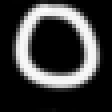
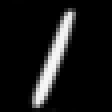
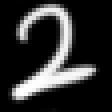
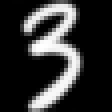
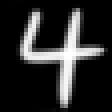
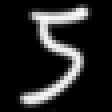
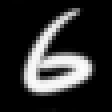
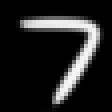
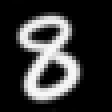
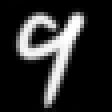

In [11]:
using Images, Plots
imgs = [Images.load("pic/mnist/$(pic_num).bmp") for pic_num in 0:9]

In [67]:
# process the images
img_formatted = map(imgs) do img
    img = img .|> rgb -> dot([rgb.r, rgb.g, rgb.b], [1 1 1]) / 3
    img = reshape(img', 28*28)
end

# start predicting
[
    (predict(img_formatted[idx]), idx-1) for idx in 1:length(img_formatted)
]

10-element Array{Tuple{Tuple{Float32,Int64},Int64},1}:
 ((0.6775051, 0), 0) 
 ((0.87202424, 1), 1)
 ((0.7262942, 2), 2) 
 ((0.41015354, 5), 3)
 ((0.5178301, 4), 4) 
 ((0.2307581, 3), 5) 
 ((0.9925464, 6), 6) 
 ((0.70303345, 3), 7)
 ((0.46103132, 3), 8)
 ((0.37600863, 4), 9)

This model just works well on some of these hand writting numbers, but provides completely wrong answers on others. The reason could be that samples in mnist are all well processed to be center and size adjusted, while these hand writting images are not. So our test accuracy could gets 94.8% but the model doesn't work well on these numbers above. This is one disadvantage of normal backpropagation NN, and CNN could get over it.

### Work With GPU

A lot of matrix calculations and space management are expensive. This heavy task needs some time with CPU. And with the scale of NN increased, CPU takes all day to train one NN, which may be a small part in our machine learning process(Because we need to tune the hyper parameters). _"There's a limit to CPU ability... ~~I reject my CPUnity, ANN!~~"_

So to improve the performance on training huge scale NN, we are supposed to assign more tasks to GPU.

Here we use [CUDA](https://github.com/JuliaGPU/CUDA.jl) in juliaGPU. If we directly convert _Array_ to _CuArray_ in the implementation, we could hard found GPU performs better, because the assignment from CPU RAM to GPU RAM needs more time. So we need to think about the better algorithm for GPU.

Recal the work flow of training a BP neural network, every hidden layer need the output activations from former layer and weight loss from the later one. The sequencial work flow could not be parallelized easily(Or we need some special theory to rebuild such time sequencial problem, e.g. the [Parareal](https://people.math.carleton.ca/~elorin/AMAI.pdf) algorithm)